## kaggle : 
https://www.kaggle.com/c/dogs-vs-cats/data

In [1]:
import os, shutil
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import models
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils import to_categorical

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers


In [2]:
small_dir = './datasets/cats_and_dogs_small'
train_dir = os.path.join(small_dir, 'train')
validation_dir = os.path.join(small_dir, 'validation')


In [3]:

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator_img = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator_img = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
for data_batch, labels_batch in train_generator_img:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


## 데이터 Argumentaion

In [5]:
# datagen = ImageDataGenerator(
#       rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')
#------------ 증강 결과 --------------------------
# from keras.preprocessing import image
# fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
# img_path = fnames[3]
# img = image.load_img(img_path, target_size=(150, 150))
# x = image.img_to_array(img)
# # (1, 150, 150, 3) 크기로 변환합니다
# x = x.reshape((1,) + x.shape)
# i = 0
# for batch in datagen.flow(x, batch_size=1):
#     plt.figure(i)
#     imgplot = plt.imshow(image.array_to_img(batch[0]))
#     i += 1
#     if i % 4 == 0:
#         break
# plt.show()

In [6]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))  #-----------------------------------------추카
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator_img = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),  #resize
        batch_size=20,
        class_mode='binary')

validation_generator_img = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),   #resize
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
#======================================= 장시간 주의 ==================================
history = model.fit_generator(
      train_generator_img,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator_img,
      validation_steps=50)

Epoch 1/10
100/100 [==============================] - 49s 486ms/step - loss: 0.6845 - acc: 0.5440 - val_loss: 0.6847 - val_acc: 0.5150
Epoch 2/10
100/100 [==============================] - 51s 512ms/step - loss: 0.6745 - acc: 0.5865 - val_loss: 0.7190 - val_acc: 0.5060
Epoch 3/10
100/100 [==============================] - 51s 507ms/step - loss: 0.6720 - acc: 0.5645 - val_loss: 0.6450 - val_acc: 0.6060
Epoch 4/10
100/100 [==============================] - 53s 530ms/step - loss: 0.6600 - acc: 0.5925 - val_loss: 0.6547 - val_acc: 0.5930
Epoch 5/10
100/100 [==============================] - 52s 520ms/step - loss: 0.6463 - acc: 0.6225 - val_loss: 0.6425 - val_acc: 0.6130
Epoch 6/10
100/100 [==============================] - 51s 511ms/step - loss: 0.6283 - acc: 0.6370 - val_loss: 0.5974 - val_acc: 0.6720
Epoch 7/10
100/100 [==============================] - 53s 526ms/step - loss: 0.6176 - acc: 0.6405 - val_loss: 0.5694 - val_acc: 0.6930
Epoch 8/10
100/100 [==============================] - 5

In [15]:
model.save('03_2_rgumentaion.h5')

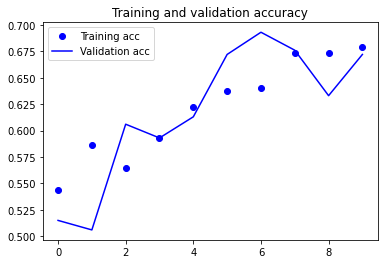

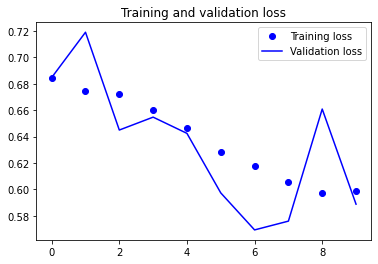

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()